# Robot Path Planning


### MatPlotlib in Python

We will be using matplotlib to plot the sample space for the Robot, the obstacles, and the path of the robot. 

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install Shapely

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import matplotlib.path as mpltPath
import math
import random
import numpy as np
from shapely.geometry import Point, MultiPoint
from shapely.geometry import Polygon, MultiPolygon, LineString
from shapely.ops import nearest_points

##### Line plots

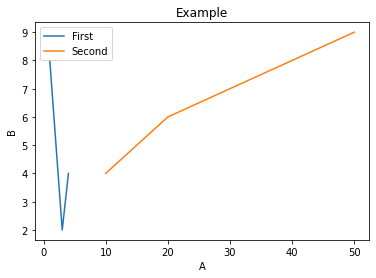

In [4]:
x = [1,3,4]
y= [8,2,4]
x2 = [10,20,50]
y2 = [4 , 6 ,9 ]
plt.plot(x,y,label = "First")
plt.plot(x2,y2,label="Second")
plt.xlabel("A")
plt.ylabel("B")
plt.title("Example")
plt.legend()
plt.show()

##### Scatter Plots

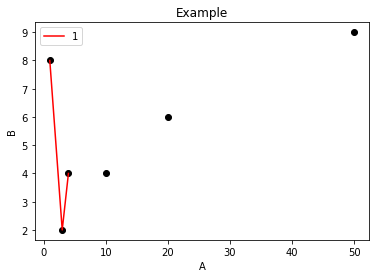

In [5]:
x1 = [1,3,4]
y1= [8,2,4]
x2 = [10,20,50]
y2 = [4 , 6 ,9 ]
plt.scatter(x1,y1,c="black")
plt.scatter(x2,y2, c="black")
plt.plot(x1, y1,"r",label = "1")
plt.xlabel("A")
plt.ylabel("B")
plt.title("Example")
plt.legend()
plt.show()

#### Obstacles using polygons

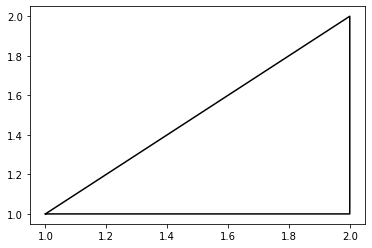

In [20]:
def obst(arr):
    ans = list()
    for coord in arr:
        m = Polygon(coord)
        x,y = m.exterior.xy
        plt.plot(x,y,"black")
        ans.append(m)
    t = MultiPolygon(ans)
    return t
obst([[(1,1),(2,1),(2,2)]])
plt.show()

#### Defining Goal region

<function matplotlib.pyplot.show(close=None, block=None)>

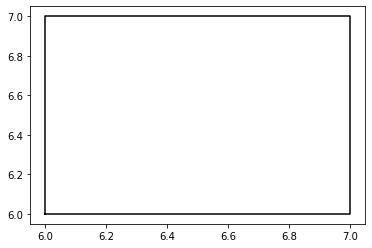

In [10]:
def goal(coord):
    m = Polygon(coord)
    x,y = m.exterior.xy
    plt.plot(x,y,"black")
    t = MultiPolygon([m])
    return t
    
goal([(6,6),(6,7),(7,7),(7,6)])
plt.show

## Trees

In [17]:
class Tree():

   	#Generic tree node
    def __init__(self, data = Point(0,0), children=None, par=None):
        self.data = data
        self.children = []
        if children is not None:
            for child in children:
                self.add_child(child)
        self.par = par
                
    def __str__(self, level=0):
        ret = "\t"*level+repr(self.data.x)+" "+repr(self.data.y)+"\n"
        for child in self.children:
            ret += child.__str__(level+1)
        return ret

    def __repr__(self):
        return '<tree node representation>'

    def add_child(self, node):
#         assert isinstance(node, Tree)
        self.children.append(node)
        node.par = self
    
    def tb(self,n):
        ax = []
        ay = []
        ax.append(n.data.x)
        ay.append(n.data.y)
        while n.data != self.data:
            n = n.par
            ax.append(n.data.x)
            ay.append(n.data.y)
        plt.plot(ax,ay,"b.-")

### RRT Algorithm to create a path

##### RRT Pseudo Code

    Qgoal #region that identifies success
    Counter = 0 #keeps track of iterations
    lim = n #number of iterations algorithm should run for
    G(V,E) #Graph containing edges and vertices, initialized as empty
    
    While counter < lim:

        Xnew  = RandomPosition()
        if IsInObstacle(Xnew) == True:
            continue
        Xnearest = Nearest(G(V,E),Xnew) //find nearest vertex
        Link = Chain(Xnew,Xnearest)
        G.append(Link)
        if Xnew in Qgoal:
            Return G
            
    Return G

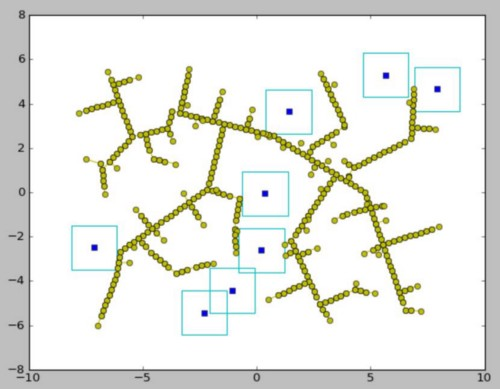



In [18]:
def distance(pt1,pt2):
    ans = math.sqrt((pt1.x-pt2.x)**2 + (pt1.y-pt2.y)**2)
    return ans
    
    
def nearestNode(pt,root,mind):
    if distance(root.data,pt)<mind:
        mind = distance(root.data,pt)
    ans = root
    for i in root.children:
        d = nearestNode(pt,i,mind)
        if d[0]<mind:
            mind = d[0]
            ans = d[1]
    return (mind, ans)


def IsInObstacle(arr,pt):
    for i in arr.geoms:
        if i.contains(pt):
            return True
    return False


def chain(node,pt):
    last = Tree(pt)
    node.add_child(last)
    return last
    
def link(node,pt):
    plt.plot([node.data.x,pt.x],[node.data.y,pt.y],"r")

Found it!


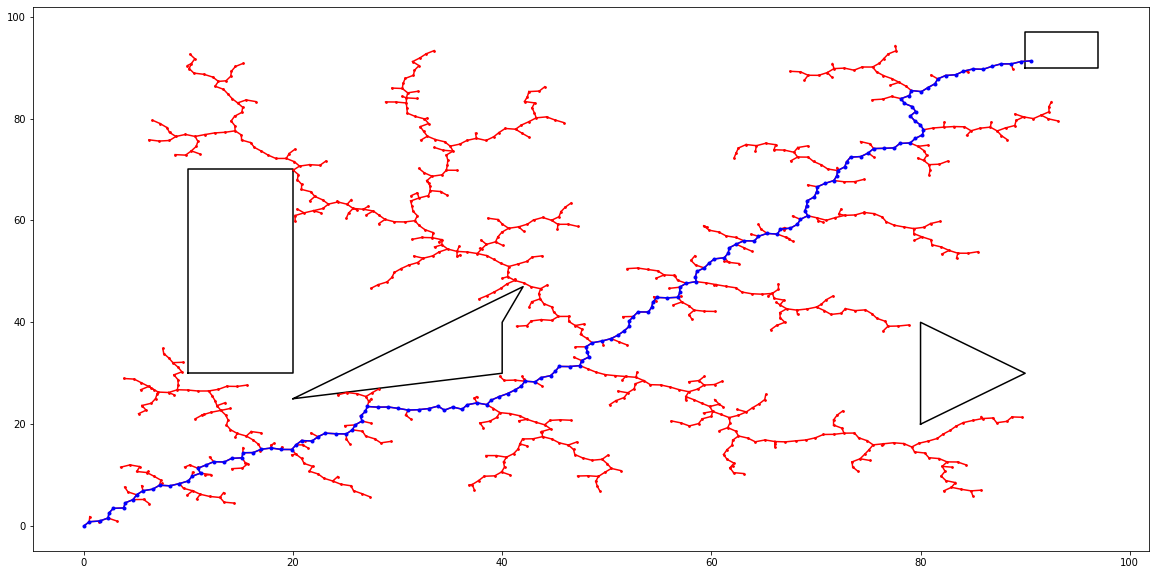

<tree node representation>

In [21]:

plt.figure(figsize=(20,10))

def rrt():
    
    Qgoal = [(90,90),(90,97),(97,97),(97,90)]
    Qgoal = goal(Qgoal)
    obstacles = [[(10,30),(10,70),(20,70),(20,30)],[(20,25),(40,30),(40,40),(42,47)],[(80,20),(90,30),(80,40)]]
    obstacles = obst(obstacles)
    
    cnt = 0 
    lim = 5000 #number of iterations algorithm should run for
    graph = Tree() #Graph containing edges and vertices, initialized as empty
    
    while cnt<lim:
        
        x  = random.random()*100
        y  = random.random()*100
        p = Point(x,y)
        
        if IsInObstacle(obstacles,p):
            continue
            
        n = nearestNode(p,graph,10**6) #find nearest vertex
        line = LineString([n[1].data,p])

        if n[0]>=1:
            p = line.interpolate(1)
            x = p.x
            y = p.y
            line = LineString([n[1].data,p])
            
        if line.crosses(obstacles):
            continue
            
        plt.scatter([x],[y],c="r", s=3)
            
        last = chain(n[1],p)
        link(n[1],p)
        
        if IsInObstacle(Qgoal,p):
            print("Found it!")
            graph.tb(last)
            plt.show()
            return graph
        
        cnt+=1
#         print(cnt,end=" ")
    graph.tb(last)
    plt.show()  
    return graph
    
rrt()

    